In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

In [4]:
!wget $data

--2024-10-02 18:01:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.008s  

2024-10-02 18:01:43 (37.8 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [5]:
df = pd.read_csv('laptops.csv')

In [6]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [8]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [11]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

laptop
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']
2160
status
['new' 'refurbished']
2
brand
['asus' 'alurin' 'msi' 'hp' 'lenovo']
27
model
['expertbook' 'go' 'katana' '15s' 'crosshair']
121
cpu
['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']
28
ram
[ 8 16 32 12  4]
9
storage
[ 512  256 1000   64  128]
12
storage_type
['ssd' 'emmc' nan]
2
gpu
[nan 'rtx_3050' 'rtx_4060' 'rtx_4050' 'rtx_3060']
44
screen
[15.6 17.3 14.  16.1 13.3]
29
touch
['no' 'yes']
2
final_price
[1009.    299.    789.   1199.    669.01]
1440


<Axes: xlabel='final_price', ylabel='Count'>

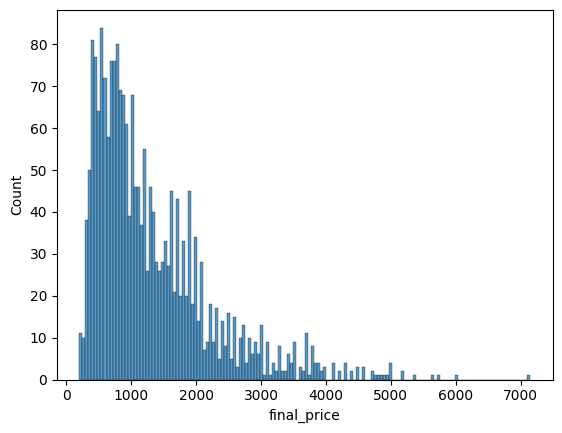

In [13]:
sns.histplot(df.final_price, bins = 150)

In [14]:
#Applying logarithmic distr,bution to get rid of the tail
price_logs = np.log1p(df.final_price)
price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

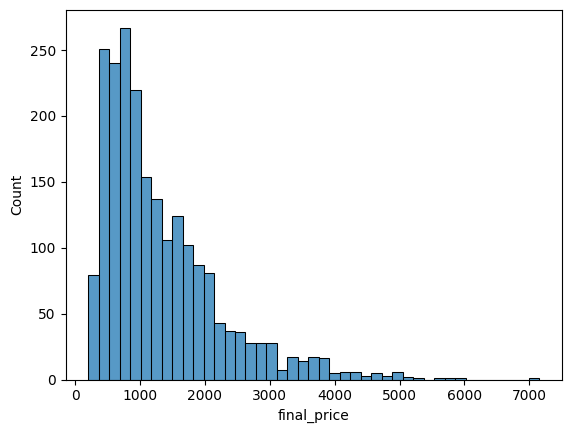

In [15]:
sns.histplot(df.final_price)

In [16]:
#Check for missing values
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [42]:
columns = ['ram', 'storage', 'screen', 'final_price']
df = df[columns]

In [43]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [44]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [45]:
n_val, n_test, n_train

(432, 432, 1296)

In [46]:
idx = np.arange(n)

In [47]:
np.random.shuffle(idx)

In [48]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [49]:
df_train

,ram,storage,screen,final_price
40,32,1000,16.1,1699.00
752,16,512,15.0,2079.00
2097,16,1000,15.6,1899.00
1453,8,256,15.6,1399.24
1677,8,512,15.6,599.00
...,...,...,...,...
699,32,1000,15.6,4099.00
605,16,1000,15.6,1553.68
1616,8,128,10.5,1147.67
775,16,512,13.3,867.53


In [50]:
len(df_train), len(df_test), len(df_val)

(1296, 432, 432)

In [51]:
df_test = df_test.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [52]:
df_train

,ram,storage,screen,final_price
0,32,1000,16.1,1699.00
1,16,512,15.0,2079.00
2,16,1000,15.6,1899.00
3,8,256,15.6,1399.24
4,8,512,15.6,599.00
...,...,...,...,...
1291,32,1000,15.6,4099.00
1292,16,1000,15.6,1553.68
1293,8,128,10.5,1147.67
1294,16,512,13.3,867.53


In [53]:
#Log transformation to price column
y_train = np.log1p(df_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)
y_val = np.log1p(df_val.final_price.values)

In [54]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [55]:
len(y_train)

1296